# Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
df_test = pd.read_excel("Test_data_transformed.xlsx")

In [3]:
df_train = pd.read_excel("Train_data_transformed.xlsx")

In [4]:
df_test.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,6,6,17,30,4,25,10,55,0,...,0,1,0,0,0,0,0,1,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,21,5,19,15,19,0,23,45,0,...,0,1,0,0,0,0,0,1,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
df_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


Now there are various method to find out the best features.

## HeatMap

Here we will just be using the train dataset

In [6]:
X = df_train.drop(['Price'] , axis = 1)

In [7]:
X.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min',
       'Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_minutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [8]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
y = df_train['Price']

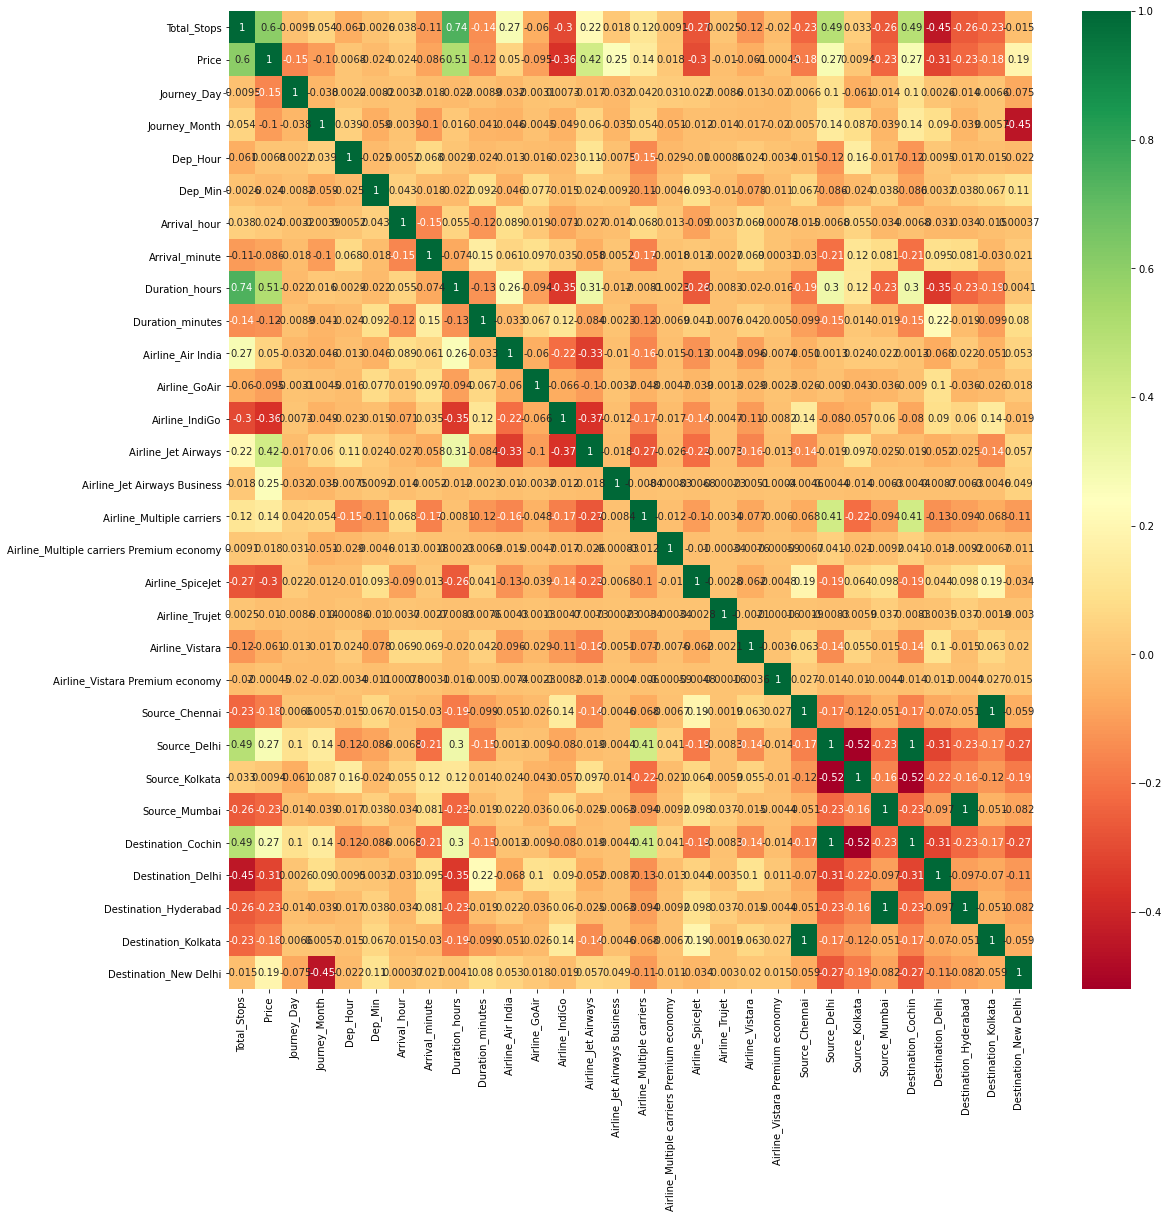

In [10]:
plt.figure(figsize = (18 , 18))
sns.heatmap(df_train.corr() , annot=True , cmap = "RdYlGn")
plt.show()

In [11]:
from sklearn.ensemble import ExtraTreesRegressor

important_features = ExtraTreesRegressor()
important_features.fit(X,y)

ExtraTreesRegressor()

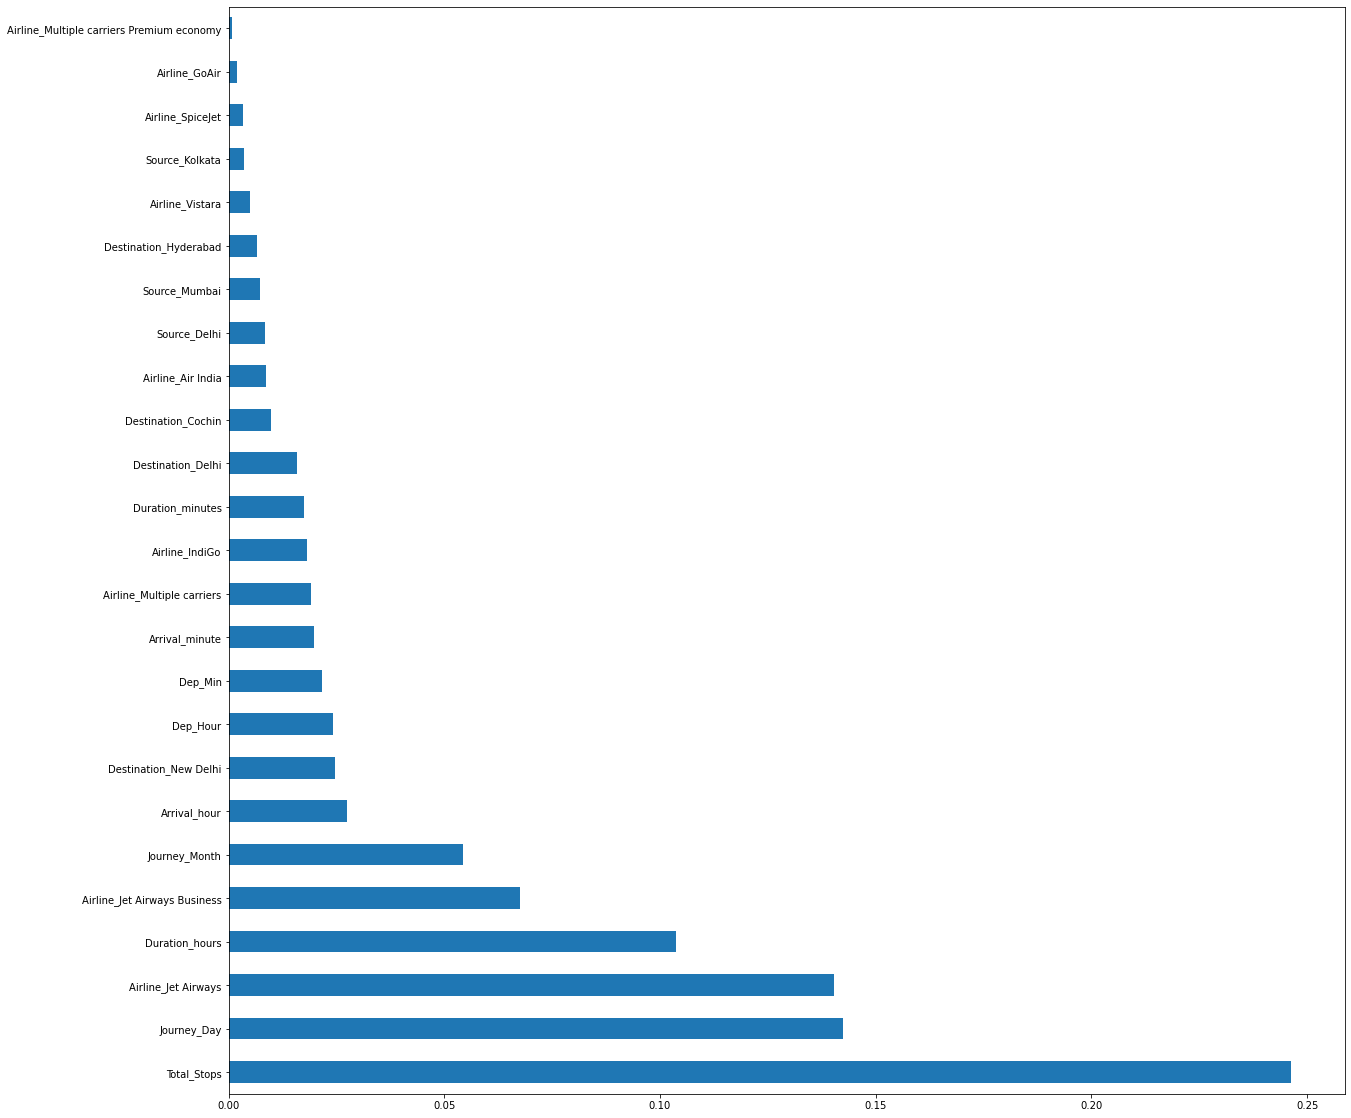

In [12]:
plt.figure(figsize=(20,20))
imp_feature = pd.Series(important_features.feature_importances_ , index=X.columns)
imp_feature.nlargest(25).plot(kind = 'barh')
plt.show()

So now we can see that which feature are really important and plays an important role.

In [13]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

array([2.17657462e+00, 8.05400297e-01, 1.28788126e+00, 1.45121652e+00,
       1.24404929e+00, 1.82121605e+00, 1.48489707e+00, 1.76528996e+00,
       1.04479111e+00, 7.63185001e-01, 8.55765630e-02, 6.81032938e-01,
       9.21952072e-01, 0.00000000e+00, 5.63582645e-01, 4.24870047e-03,
       3.32778992e-01, 1.87333373e-03, 2.31433095e-01, 0.00000000e+00,
       1.60157735e-01, 1.53153153e+00, 8.93090782e-01, 2.82330124e-01,
       1.52154886e+00, 4.09175304e-01, 2.78416418e-01, 1.61187012e-01,
       3.78678447e-01])

In [14]:
imp_features = pd.DataFrame(mutual_info_classif(X,y) , index=X.columns)
imp_features

,0
Total_Stops,2.126202
Journey_Day,0.809070
Journey_Month,1.226554
Dep_Hour,1.464097
Dep_Min,1.209299
Arrival_hour,1.803855
Arrival_minute,1.537533
Duration_hours,1.780110
Duration_minutes,1.074903
Airline_Air India,0.777383


In [15]:
imp_features.columns = ['Feature Importance']
imp_features.sort_values(by="Feature Importance" , ascending=False)

,Feature Importance
Total_Stops,2.126202
Arrival_hour,1.803855
Duration_hours,1.780110
Source_Delhi,1.562351
Destination_Cochin,1.548425
Arrival_minute,1.537533
Dep_Hour,1.464097
Journey_Month,1.226554
Dep_Min,1.209299
Duration_minutes,1.074903


# Outlier Detection

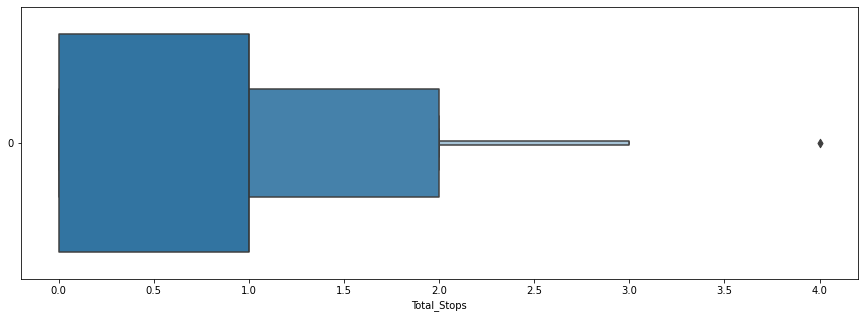

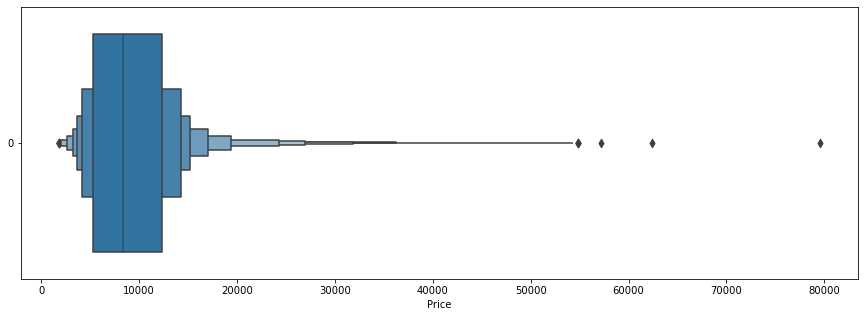

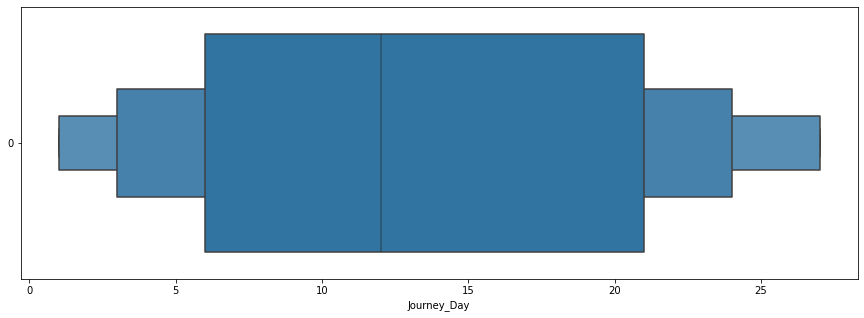

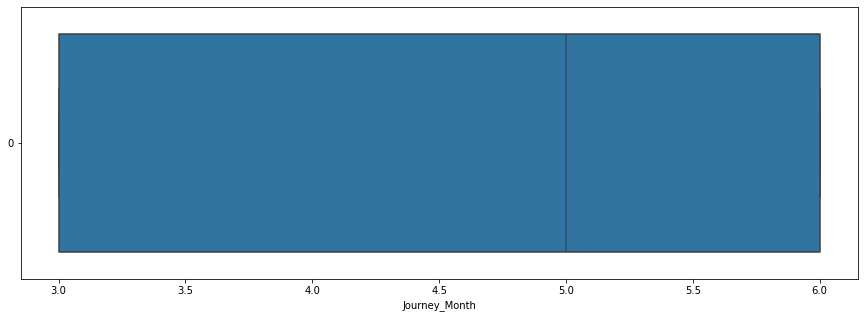

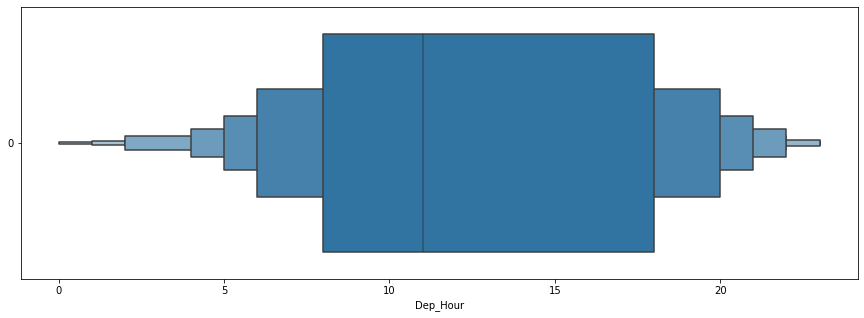

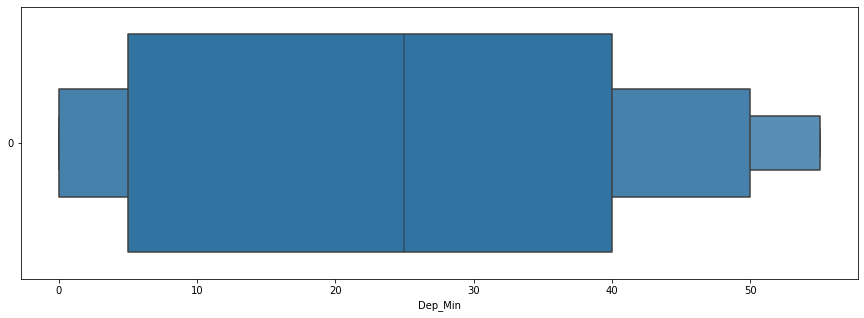

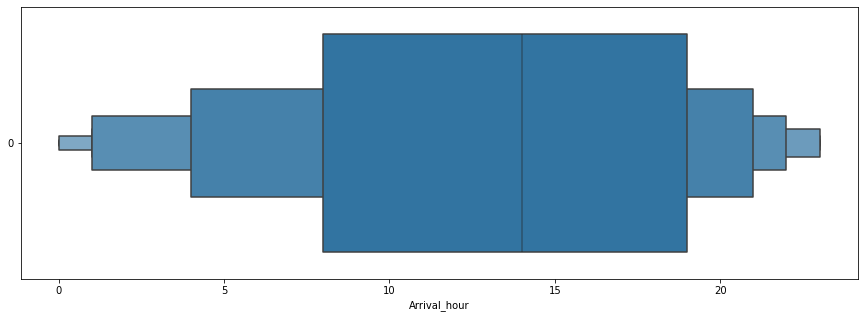

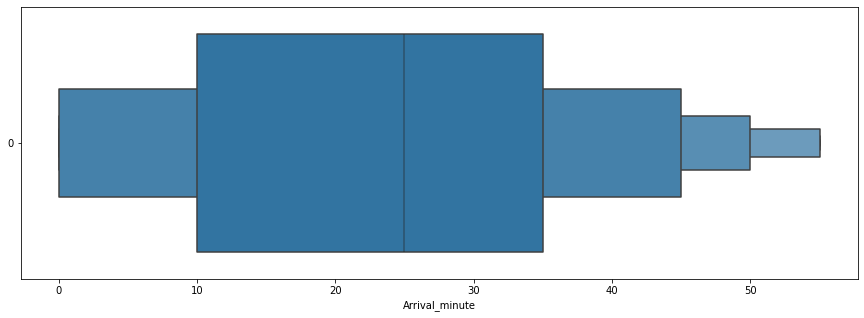

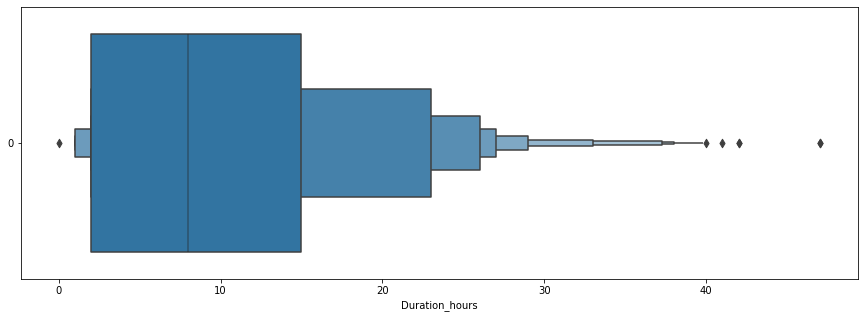

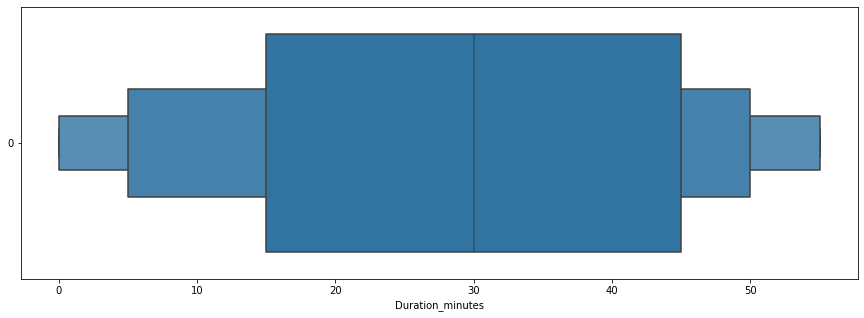

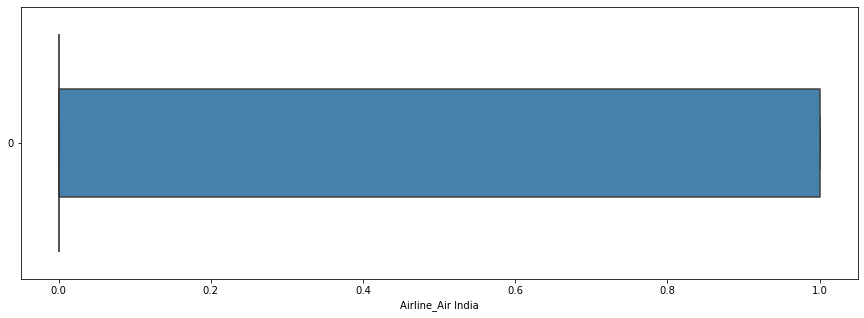

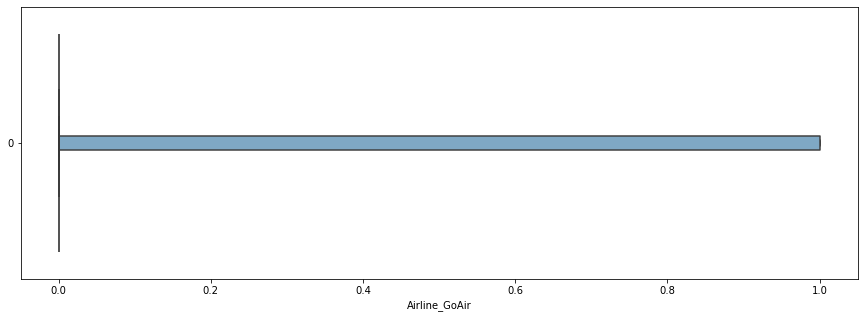

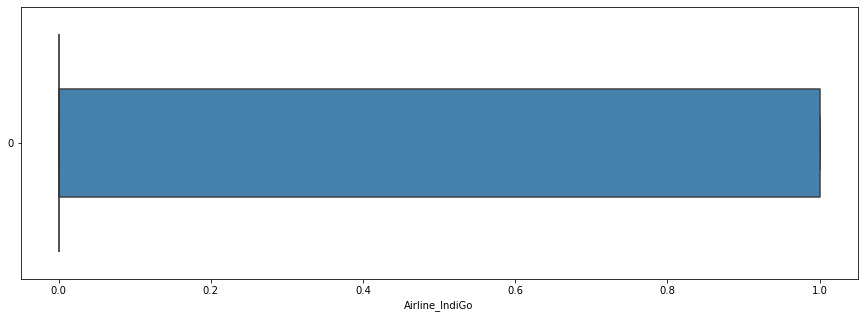

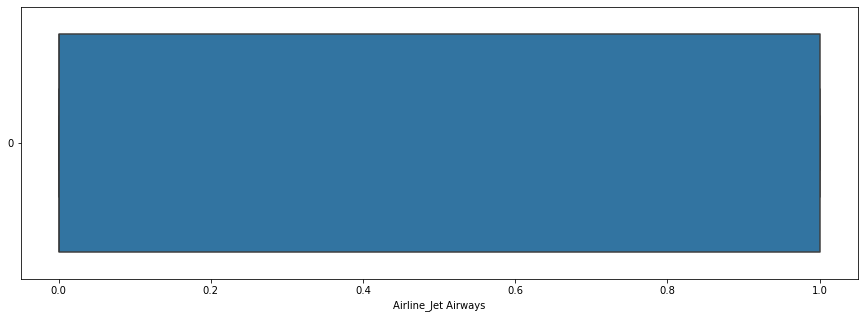

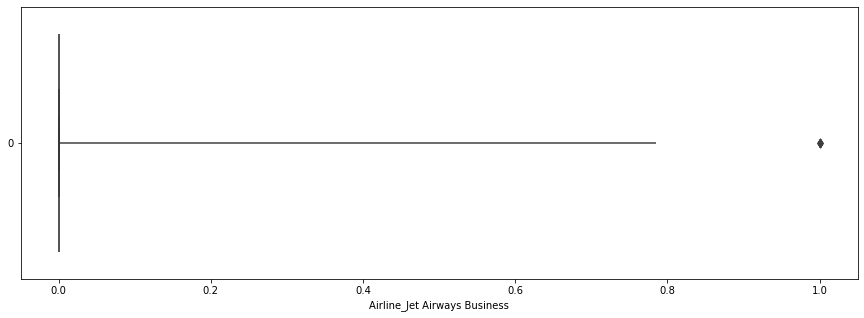

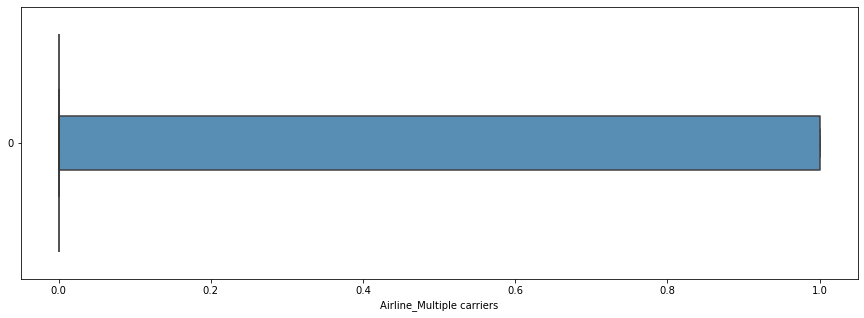

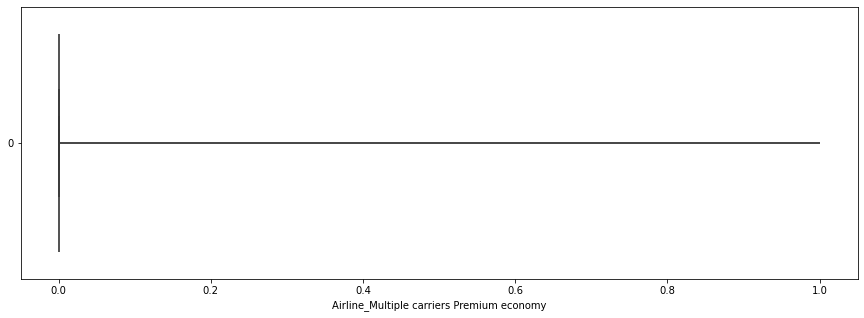

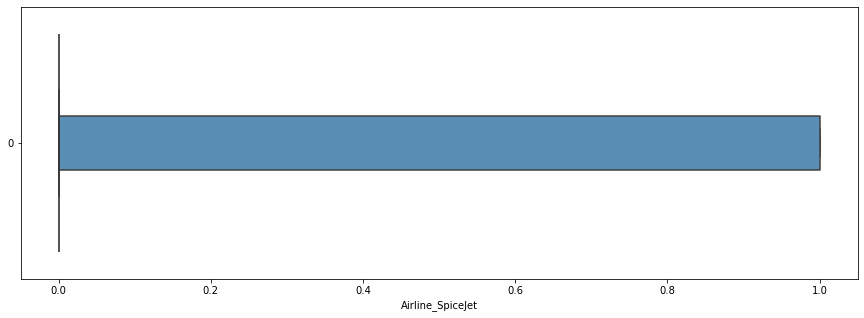

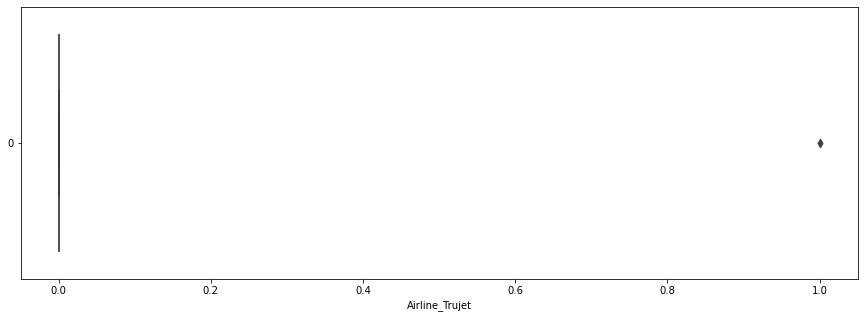

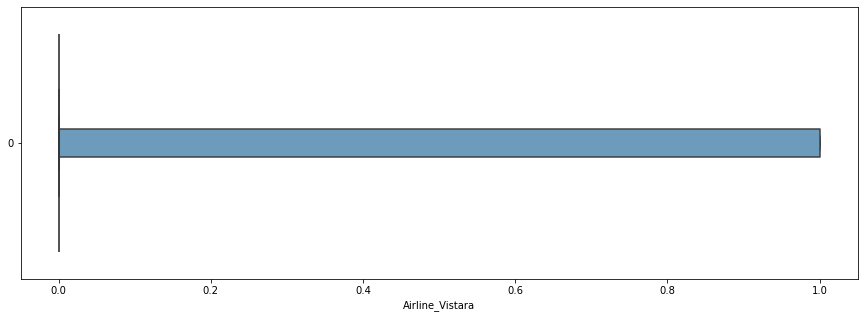

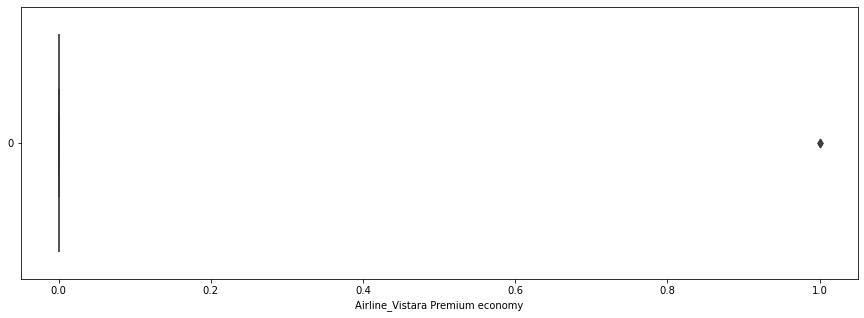

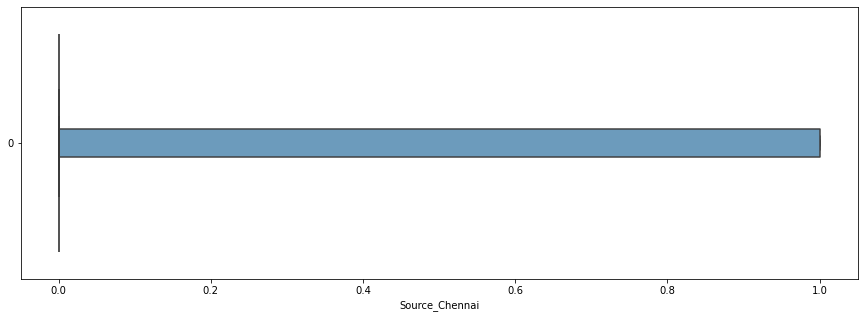

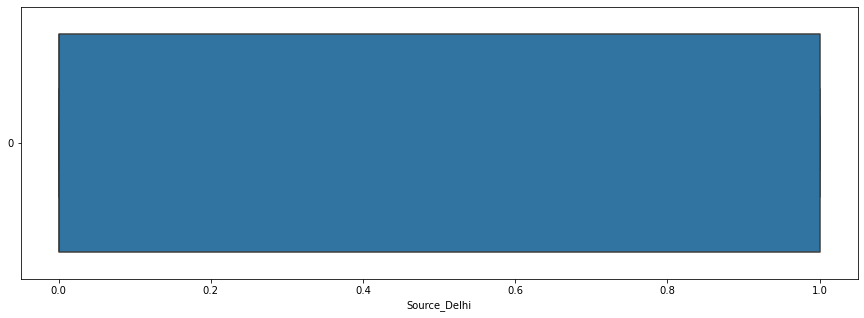

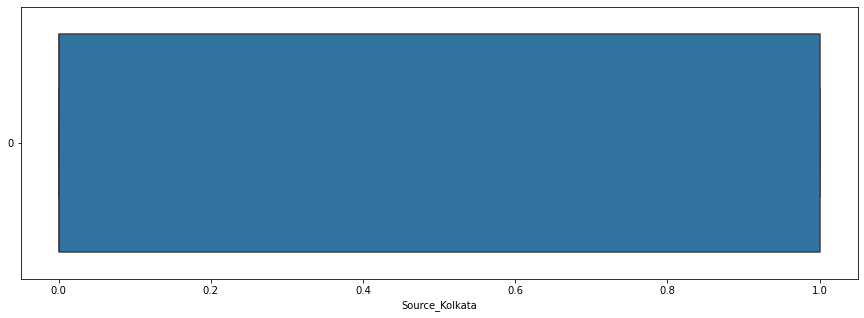

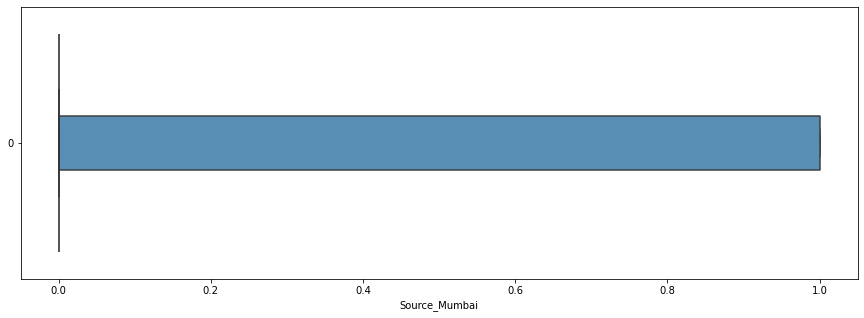

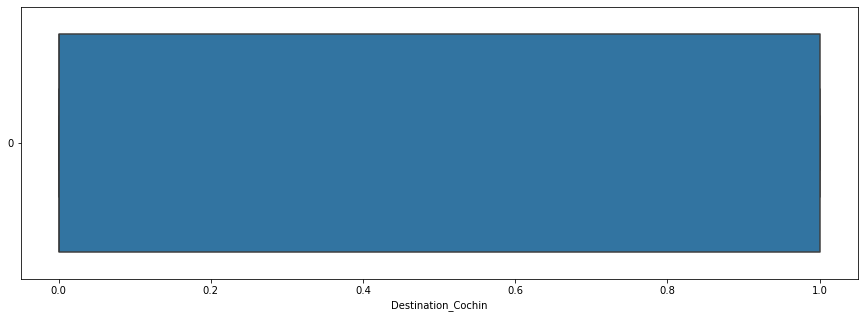

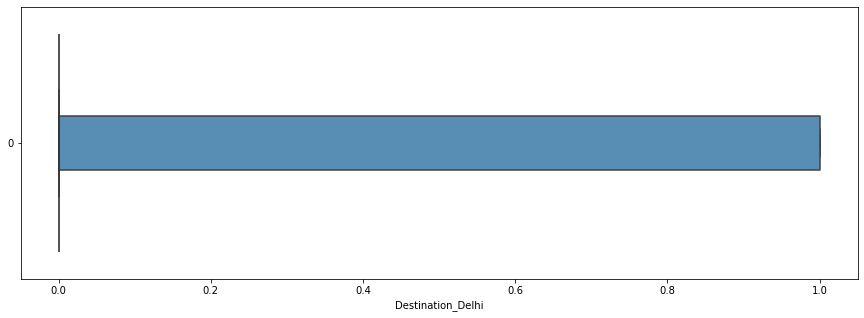

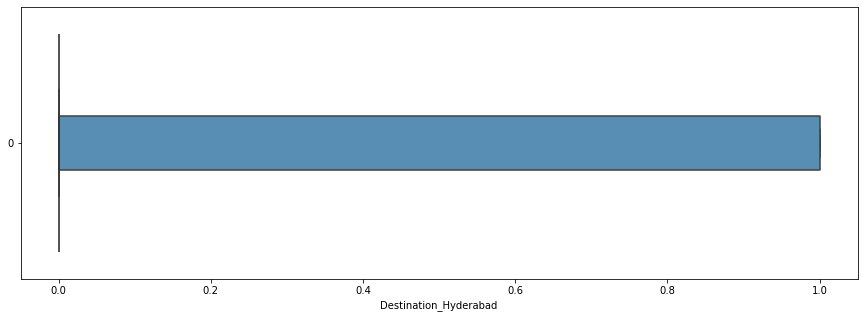

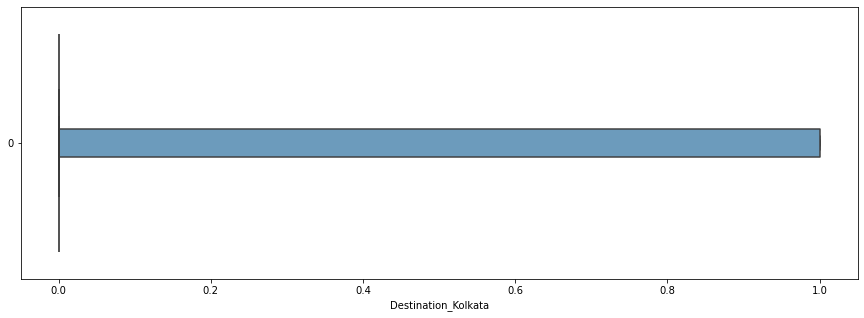

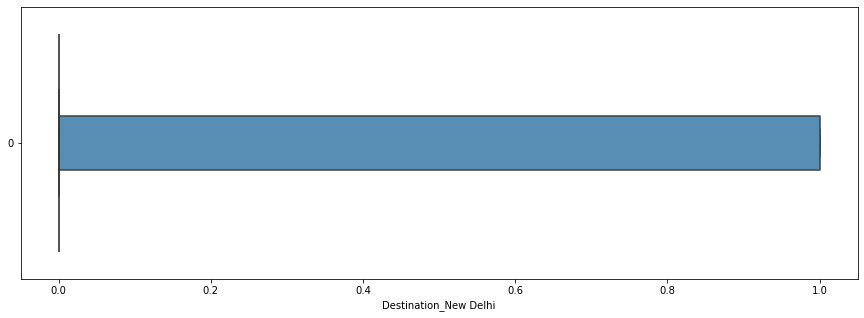

In [26]:
for feature in df_train.columns:
    plt.figure(figsize = (15,5))
    sns.boxenplot(data = df_train[feature] , orient="h")
    plt.xlabel(feature)
    plt.show()

Looking at the plots , it seems that only the price and duration hours column has a few outliers. 
So we need to remove those outliers.

In [27]:
#Removing Outliers using IQR method

Q1 = np.percentile(df_train['Price'] , 25 , interpolation='midpoint')
Q3 = np.percentile(df_train['Price'] , 75 , interpolation='midpoint')
IQR = Q3 - Q1
print(IQR)

upper = np.where(df_train['Price'] >= (Q3+1.5*IQR))
lower = np.where(df_train['Price'] <= (Q1-1.5*IQR))

df_train.drop(upper[0] , inplace=True)
df_train.drop(lower[0] , inplace=True)

7096.0


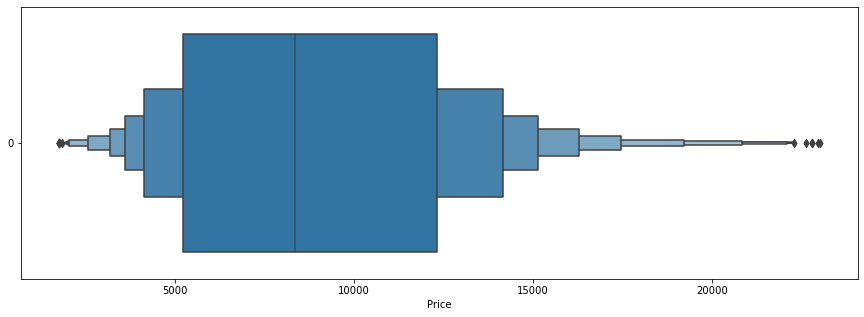

In [28]:
plt.figure(figsize = (15, 5))
sns.boxenplot(data = df_train['Price'] , orient='h')
plt.xlabel("Price")
plt.show()

So Now we Can see that the outliers have been removed from price column

In [33]:
df_train.shape

(10586, 30)

In [36]:
df_train.to_excel("Flight_Outliers_Removed.xlsx" , index=False)